##Julio Cesar Flores Molina##
Fisica aplicada


#Filtro usado#
En la primera capa convolucional se usarin **32 filtros** (o kernels) de tamaño **3×3**. Cada filtro recorre la imagen y extrae patrones básicos como bordes o texturas, generando 32 “mapas de características” distintos.

Se eligio un **kernel de 3×3** porque, al ser pequeño, captura muy bien los detalles locales sin añadir demasiados parámetros al modelo. Y optamos por **32 filtros** porque es un número suficiente para aprender varias formas básicas sin que el entrenamiento se vuelva lento ni consuma excesiva memoria.

De esta manera, el modelo arranca reconociendo rasgos sencillos y, en las capas siguientes, puede aumentar progresivamente el número de filtros para identificar patrones más complejos.


- **Tipo de filtro:** Convolucional (Conv2D)  
- **Tamaño:** 3×3 píxeles  
- **Cantidad:** 32 filtros paralelos  
- **Activación:** ReLU  



In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [2]:
from tensorflow.keras.datasets import fashion_mnist

# Carga los datos de Fashion‑MNIST
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print("X_train shape:", X_train.shape)  # (60000, 28, 28)
print("y_train shape:", y_train.shape)  # (60000,)
print("X_test  shape:", X_test.shape)   # (10000, 28, 28)
print("y_test  shape:", y_test.shape)   # (10000,)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test  shape: (10000, 28, 28)
y_test  shape: (10000,)


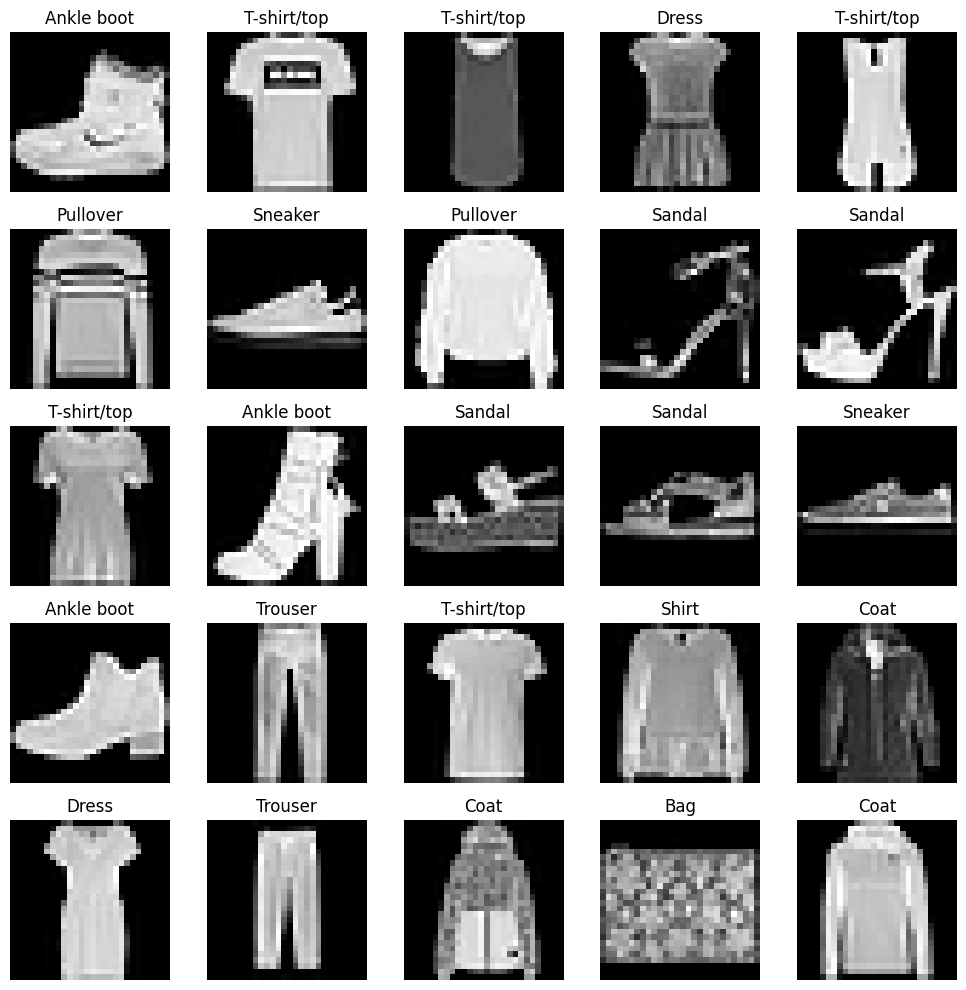

In [3]:
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()


In [4]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [5]:
# Redimensionar las imágenes para incluir el canal

X_train = np.expand_dims(X_train, axis=-1)  # Ahora (60000, 28, 28, 1)
X_test  = np.expand_dims(X_test,  axis=-1)  # Ahora (10000, 28, 28, 1)

print("Forma de los datos de entrenamiento:", X_train.shape)
print("Forma de los datos de prueba:      ", X_test.shape)


Forma de los datos de entrenamiento: (60000, 28, 28, 1)
Forma de los datos de prueba:       (10000, 28, 28, 1)


In [6]:
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

In [7]:
print("Nueva forma de X_train:", X_train.shape)
print("Nueva forma de y_train:", y_train.shape)


Nueva forma de X_train: (60000, 28, 28, 1)
Nueva forma de y_train: (60000, 10)


In [8]:
from tensorflow import keras
from tensorflow.keras import layers

# 1. Definición del modelo
model = keras.Sequential([
    layers.Conv2D(
        filters=32, kernel_size=(3, 3), activation="relu",
        input_shape=(28, 28, 1)
    ),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(10, activation="softmax")
])

# 2. Compilación del modelo
model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# 3. Resumen de la arquitectura
model.summary()

# 4. Entrenamiento sobre Fashion-MNIST
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=64,
    validation_data=(X_test, y_test)
)

# 5. Evaluación final
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Precisión en test: {test_acc:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7380 - loss: 0.7357 - val_accuracy: 0.8616 - val_loss: 0.3794
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8713 - loss: 0.3508 - val_accuracy: 0.8816 - val_loss: 0.3286
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8915 - loss: 0.2957 - val_accuracy: 0.8978 - val_loss: 0.2960
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9024 - loss: 0.2635 - val_accuracy: 0.9023 - val_loss: 0.2670
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9117 - loss: 0.2382 - val_accuracy: 0.9022 - val_loss: 0.2679
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9198 - loss: 0.2189 - val_accuracy: 0.9039 - val_loss: 0.2658
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9253 - loss: 0.1983 - val_accuracy: 0.9033 - val_loss: 0.2702
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9301 - loss: 0.1846 - val_accuracy: 0

In [9]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test accuracy:", test_acc)

Test accuracy: 0.9172000288963318


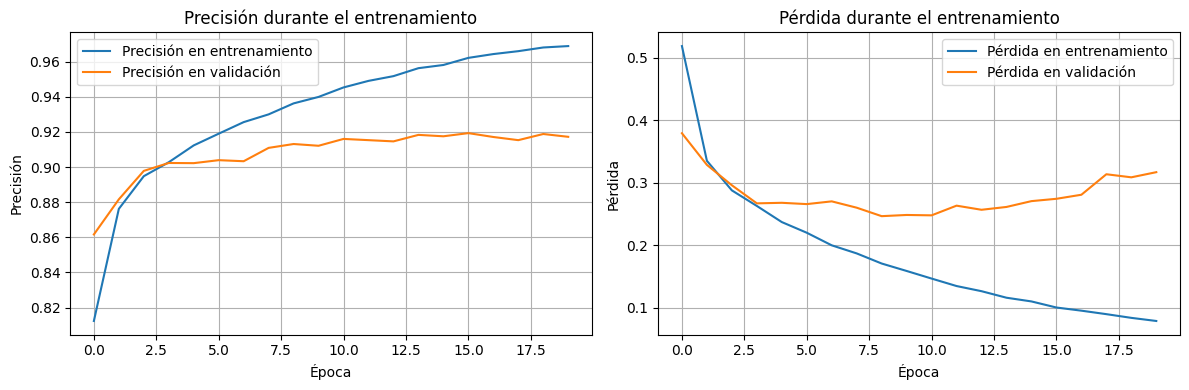

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))  # Tamaño del gráfico

# Gráfica de precisión
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)

# Gráfica de pérdida
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


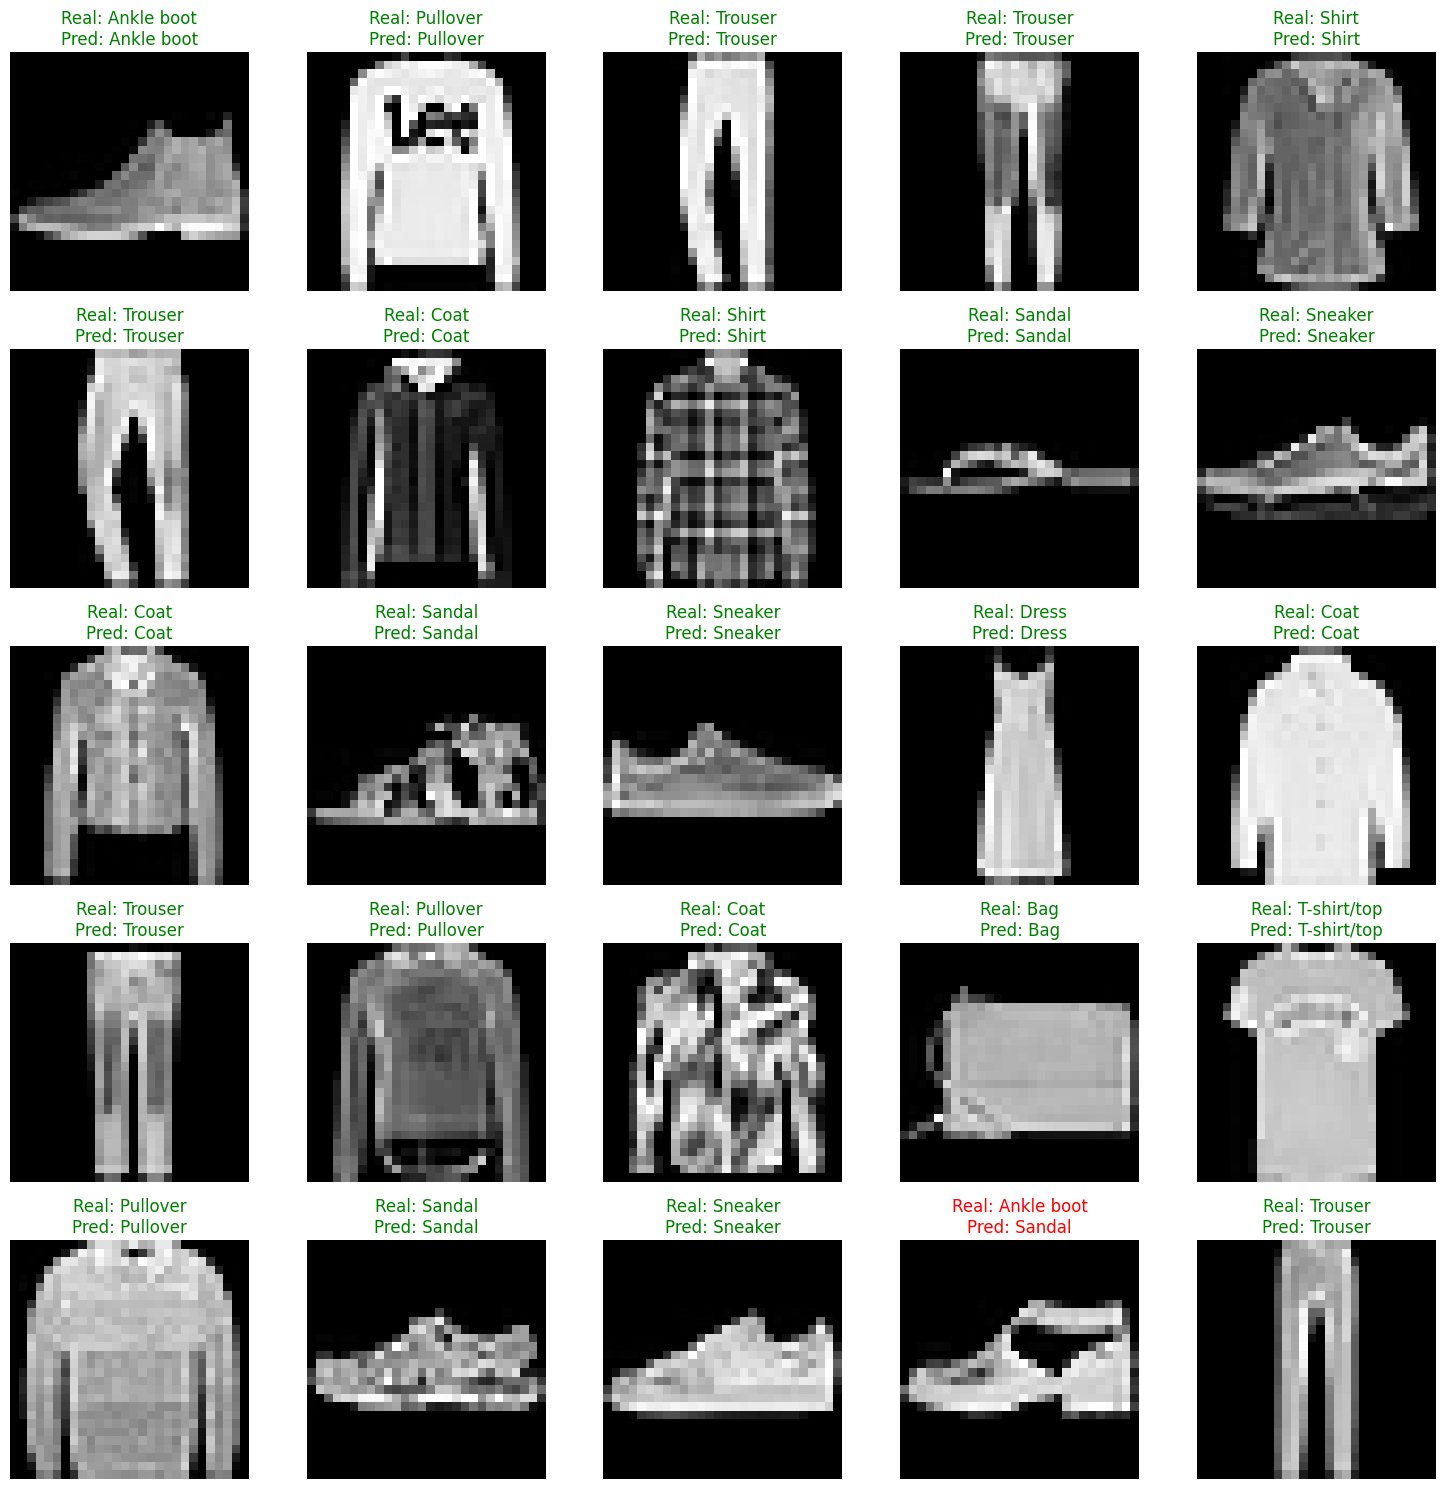

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Generar predicciones
predictions = model.predict(X_test)

# 2. Convertir probabilidades a etiquetas
predicted_labels = np.argmax(predictions, axis=1)
true_labels      = np.argmax(y_test,       axis=1)

# 3. Mostrar un grid de 5×5 imágenes con etiquetas y predicciones
plt.figure(figsize=(15, 15))
for i in range(25):
    plt.subplot(5, 5, i + 1)

    img = X_test[i].squeeze()  # de (28,28,1) a (28,28)
    plt.imshow(img, cmap='gray')

    # Determinar color del título
    correct = (predicted_labels[i] == true_labels[i])
    color = 'green' if correct else 'red'

    # Usar nombres de clase
    true_name      = class_names[ true_labels[i] ]
    predicted_name = class_names[ predicted_labels[i] ]

    plt.title(f"Real: {true_name}\nPred: {predicted_name}", color=color)
    plt.axis('off')

plt.tight_layout()
plt.show()


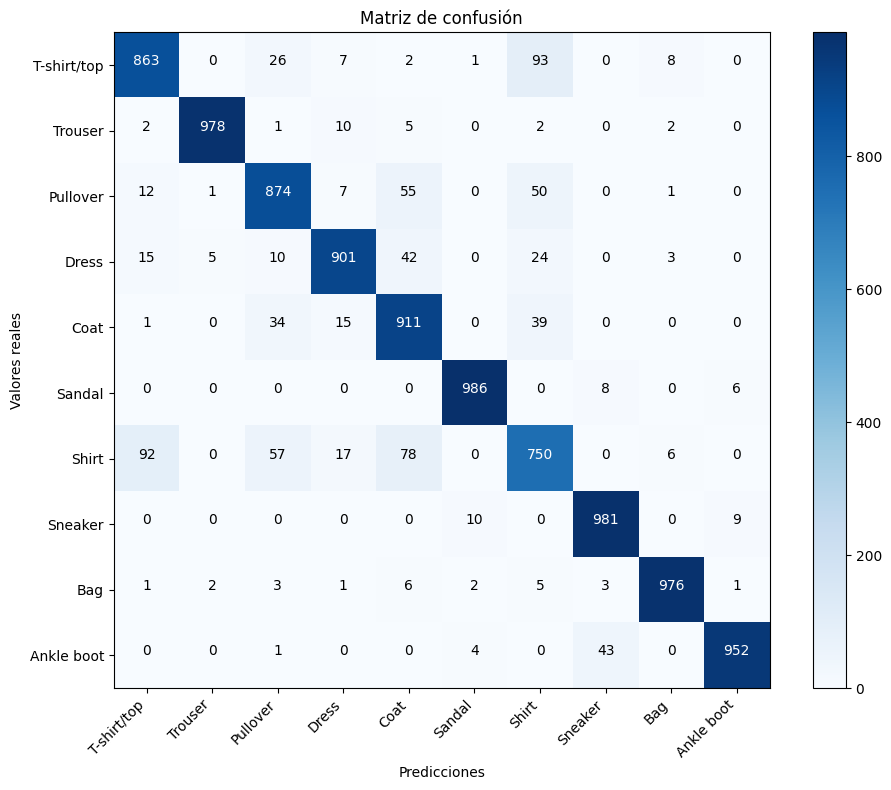

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Matriz de confusión')
plt.colorbar()
classes = class_names

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45, ha='right')
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('Valores reales')
plt.xlabel('Predicciones')
plt.tight_layout()
plt.show()
